In [1]:
import qflib as qf
import numpy as np
import matplotlib.pyplot as plt

qf.version()

'0.6.0-debug'

### Problem 1

[ 3.46944695e-18 -3.46944695e-18  3.46944695e-18 -1.73472348e-17
  3.46944695e-18  0.00000000e+00 -2.08166817e-17  4.16333634e-17
  1.38777878e-17  0.00000000e+00 -2.77555756e-17  3.46944695e-17
  3.46944695e-17 -4.85722573e-17 -1.38777878e-17  3.46944695e-17
  3.46944695e-17 -1.38777878e-17  3.46944695e-17 -1.31838984e-16
 -1.38777878e-17  2.01227923e-16 -1.31838984e-16  2.08166817e-16
 -7.63278329e-17  4.16333634e-17 -1.24900090e-16  9.02056208e-17
  4.16333634e-17 -1.24900090e-16 -7.63278329e-17  2.08166817e-16
  4.16333634e-17 -2.42861287e-16  2.49800181e-16  4.85722573e-17]
Forward rates are equal


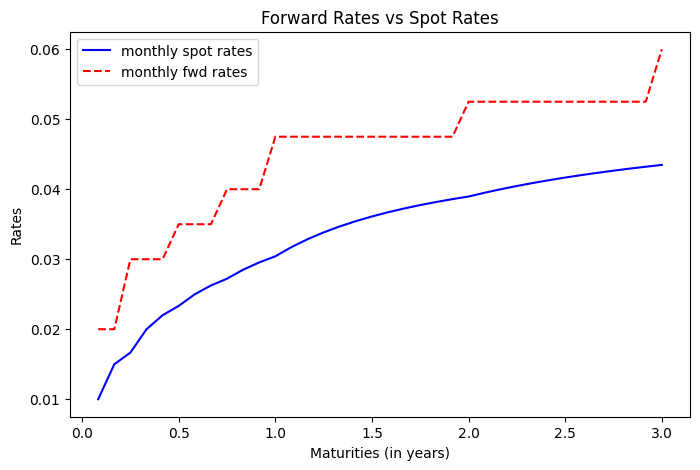

In [2]:
#Create USD-LIBOR yield curve
maturities = [1/12, 1/4, 1/2, 3/4, 1, 2, 3, 5]
spot_rates = [0.01, 0.02, 0.03, 0.035, 0.04, 0.0475, 0.0525, 0.06]
qf.ycCreate("USD-LIBOR", maturities, spot_rates, 1)

#Create list of monthly maturities ranging from 1 month to 3 years
monthly_maturities = np.arange(1/12, 3+2/12, 1/12)

#Calculate forward rates using qflib
fwd_monthly_maturities1 = []
for i in range(len(monthly_maturities)-1):
    fwd_monthly_maturities1.append(qf.fwdRate("USD-LIBOR", monthly_maturities[i], monthly_maturities[i+1]))

#Calculate forward rates manually using spot rates
monthly_spot_rates = []
fwd_monthly_maturities2 = []
for i in range(len(monthly_maturities)-1):
    r1 = qf.spotRate("USD-LIBOR", monthly_maturities[i])
    t1 = monthly_maturities[i]
    r2 = qf.spotRate("USD-LIBOR", monthly_maturities[i+1])
    t2 = monthly_maturities[i+1]
    f12 = (r2 * t2 - r1* t1) / (t2 - t1)
    monthly_spot_rates.append(r1)
    fwd_monthly_maturities2.append(f12)
monthly_maturities = monthly_maturities[:-1]

#Calculate difference between the two methods
difference = np.array(fwd_monthly_maturities1) - np.array(fwd_monthly_maturities2)

#Print results
print(difference)

#Check if the two methods yield the same result
if (abs(difference) < 1e-15).all():
    print("Forward rates are equal")
else:
    print("Forward rates are not equal")

#Plot the results
x = monthly_maturities
y1 = monthly_spot_rates
y2 = fwd_monthly_maturities2

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y1, label="monthly spot rates", color="blue", linestyle="-")  
plt.plot(x, y2, label="monthly fwd rates", color="red", linestyle="--")  

# Labels and Title
plt.xlabel("Maturities (in years)")
plt.ylabel("Rates")
plt.title("Forward Rates vs Spot Rates")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Problem 2

In [16]:
# Create VOLTS
maturities = [0.25, 0.50, 0.75, 1.00, 1.50, 2.00, 3.00, 4.00]
spot_vol = [0.20, 0.22, 0.23, 0.25, 0.27, 0.30, 0.35, 0.40]

qf.volCreate("VOLTS", maturities, spot_vol, 0)

# Calculate one-period forward volatilities using qflib
one_period_fwd_vol1 = []
for i in range(len(maturities)-1):
    fwd_vol = qf.fwdVol("VOLTS", maturities[i], maturities[i+1])
    one_period_fwd_vol1.append(fwd_vol)

# Calculate one-period forward volatilities manually using spot volatilities
one_period_fwd_vol2 = []
for i in range(len(maturities)-1):
    var_t_t1 = spot_vol[i] ** 2
    var_t_t2 = spot_vol[i+1] ** 2
    t1 = maturities[i]
    t2 = maturities[i+1]
    fwd_vol = (var_t_t2 * t2 - var_t_t1 * t1) / (t2 - t1)
    one_period_fwd_vol2.append(np.sqrt(fwd_vol))

# Show that the two methods yield the same result
difference_vol = np.array(one_period_fwd_vol1) - np.array(one_period_fwd_vol2)
print("Difference in forward volatilities:")
print(difference_vol)

if (abs(difference_vol) == 0).all():
    print("Forward volatilities are equal")

Difference in forward volatilities:
[0. 0. 0. 0. 0. 0. 0.]
Forward volatilities are equal
